# Звіт з виконання домашньої роботи II
**Студент:** Гузій Захар

Імпортовані бібліотеки

In [1]:
import pandas as pd
import math
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt

## Завдання №1

**Метод Бісекції**

In [2]:
def bisection(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему",
    else:
        last5 = []
        c = (a + b) / 2
        k = 1
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': f(c)}
            last5.append(record)
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a + b) / 2
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": f(c)}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Реалізація методу бісекції за допомогою вбудованої бібліотеки**

In [3]:
def bisection_scipy(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему"
    result = sc.bisect(f, a, b, xtol=e, full_output=True, disp=False)
    return result.root, result.iterations

**Метод хибного положення (regula-falsi)**

In [4]:
def regula_falsi(f, a, b, e):
    if f(a) * f(b) >= 0:
        return "На жаль, цей метод не може вирішити дану проблему", None
    else:
        last5 = []
        k = 1
        c = (a * f(b) - b * f(a)) / (f(b) - f(a))
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': f(c)}
            last5.append(record)
            if f(a) * f(c) < 0:
                b = c
            else:
                a = c
            c = (a * f(b) - b * f(a)) / (f(b) - f(a))
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": f(c)}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Модифікований метод хибного положення (regula-falsi modified)**

In [32]:
def regula_falsi_modified(f, a, b, e):
    if f(a) * f(b) >= 0:
        return f(a) * f(b), "На жаль, цей метод не може вирішити дану проблему"
    else:
        fa, fb = f(a), f(b)
        c = (a * fb - b * fa) / (fb - fa)
        fc = f(c)
        last = None
        last5 = []
        k = 1
        while abs(f(c)) > e:
            record = {"k": k, 'a_k': a, 'b_k': b, 'x_k': c, 'f_xk': fc}
            last5.append(record)
            if fa * fc < 0:
                b, fb = c, fc
                if last == 'b':
                    fb /= 2
                last = 'b'
            else:
                a, fa = c, fc
                if last == 'a':
                    fa /= 2
                last = 'a'
            c = (a * fb - b * fa) / (fb - fa)
            fc = f(c)
            k += 1
        record = {"k": k, "a_k": a, "b_k": b, "x_k": c, "f_xk": fc}
        last5.append(record)
        df_last5 = pd.DataFrame(last5[-5:])
        return c, df_last5

**Розв'язання завданнь**

1.1  $f_1(x) = e^x - 4x, \; x \in [-1, 1], \; \varepsilon = 10^{-6}$

In [19]:
f1_bisection, df_last5_11 = bisection(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [17]:
print(f1_bisection)

0.3574028015136719


In [23]:
print(df_last5_11)

    k       a_k       b_k       x_k          f_xk
0  15  0.357300  0.357422  0.357361  1.082566e-04
1  16  0.357361  0.357422  0.357391  2.981341e-05
2  17  0.357391  0.357422  0.357407 -9.407687e-06
3  18  0.357391  0.357407  0.357399  1.020282e-05
4  19  0.357399  0.357407  0.357403  3.975561e-07


In [26]:
f1_regula_falsi, df_last5_1 = regula_falsi(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [27]:
print(f1_regula_falsi)

0.35740307221659706


In [28]:
print(df_last5_1)

    k  a_k       b_k       x_k          f_xk
0   6   -1  0.357755  0.357474 -1.819824e-04
1   7   -1  0.357474  0.357417 -3.661716e-05
2   8   -1  0.357417  0.357406 -7.367531e-06
3   9   -1  0.357406  0.357404 -1.482366e-06
4  10   -1  0.357404  0.357403 -2.982555e-07


In [33]:
f1_mod_reg_fal, df_last5_11 = regula_falsi_modified(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-6)

In [34]:
print(f1_mod_reg_fal)

0.35740329216721883


In [35]:
print(df_last5_11)

    k  a_k       b_k       x_k          f_xk
0  21   -1  0.357407  0.357406 -6.637051e-06
1  22   -1  0.357406  0.357405 -3.986220e-06
2  23   -1  0.357405  0.357404 -2.394128e-06
3  24   -1  0.357404  0.357404 -1.437916e-06
4  25   -1  0.357404  0.357403 -8.636139e-07


1.2 $f_1(x) = e^x - 4x, \; x \in [-1, 1], \; \varepsilon = 10^{-12}$

In [21]:
f1_2_bisection, df_last5_12 = bisection(lambda x: math.exp(x) - 4 * x, -1, 1, 1e-12)

In [22]:
print(f1_2_bisection)

0.35740295618143136


In [24]:
print(df_last5_12)

    k       a_k       b_k       x_k          f_xk
0  37  0.357403  0.357403  0.357403 -1.179790e-11
1  38  0.357403  0.357403  0.357403  6.904033e-12
2  39  0.357403  0.357403  0.357403 -2.446932e-12
3  40  0.357403  0.357403  0.357403  2.228662e-12
4  41  0.357403  0.357403  0.357403 -1.092459e-13


2 $f_2(x) = -0.9x^2 + 1.7x + 2.5, \; x \in [2.8, 3], \; \varepsilon = 10^{-8}$

0.7382200277285537
    k      a_k  b_k      x_k          f_xk
0  42  0.73822    1  0.73822  1.447574e-03
1  43  0.73822    1  0.73822  1.447574e-03
2  44  0.73822    1  0.73822  1.447574e-03
3  45  0.73822    1  0.73822  1.447574e-03
4  46  0.73822    1  0.73822  8.228507e-17


$$
n_{\max} = \left\lceil \log\left(\frac{b - a}{\varepsilon}\right)
\right\rceil
$$


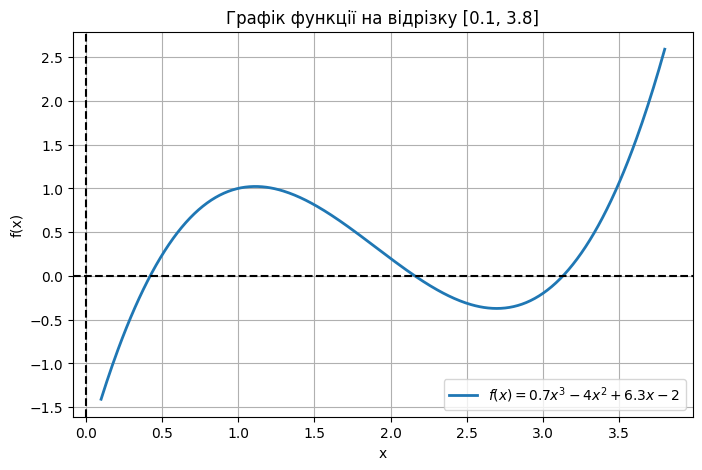

In [12]:
def f(x):
    return 0.7 * x ** 3 - 4 * x ** 2 + 6.3 * x - 2


x = np.linspace(0.1, 3.8, 400)
y = f(x)

plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r"$f(x)=0.7x^3 - 4x^2 + 6.3x - 2$", linewidth=2)
plt.axhline(0, color='black', linestyle='--')
plt.axvline(0, color='black', linestyle='--')
plt.title("Графік функції на відрізку [0.1, 3.8]")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


2 task

fixed point method

In [13]:
def fixedPoint(f, x0, e):
    x_cur = x0
    last5 = []
    while True:
        x_next = f(x_cur)
        record = {"x_cur": x_cur, "x_next": x_next, "diff": abs(x_next - x_cur)}
        last5.append(record)
        if abs(x_next - x_cur) < e:
            break
        x_cur = x_next
    record = {"x_cur": x_cur, "x_next": x_next, "diff": abs(x_next - x_cur)}
    last5.append(record)
    df_last5 = pd.DataFrame(last5[-5:])
    return x_next, df_last5

3 task

In [14]:
def golden_search(f, a, b, e):
    golden_ratio = (1 + math.sqrt(5)) / 2
    r = golden_ratio - 1
    x1 = b - r * (b - a)
    x2 = a + r * (b - a)
    last5 = []
    k = 1
    while abs(f(x1) - f(x2)) > e:
        x_k = (a + b) / 2
        record = {"k": k, "a_k": a, "b_k": b, "x_k": x_k, "f_xk": f(x_k)}
        last5.append(record)
        if f(x1) > f(x2):
            a = x1
            x1 = x2
            x2 = a + r * (b - a)
            k += 1
        else:
            b = x2
            x2 = x1
            x1 = b - r * (b - a)
            k += 1
    record = {"k": k, "a_k": a, "b_k": b, "x_k": x_k, "f_xk": f(x_k)}
    last5.append(record)
    df_last5 = pd.DataFrame(last5[-5:])
    x_min = x_k
    return x_min, f(x_min), df_last5

In [15]:
def fibonacci(f, a, b, e):
    L = b - a
    fn = [0, 1]
    while fn[-1] < L / e:
        fn.append(fn[-1] + fn[-2])
    last5 = []
    K_k = 1
    n = len(fn) - 1
    x1 = a + (fn[n - 2] / fn[n]) * L
    x2 = b - (fn[n - 2] / fn[n]) * L
    for k in range(n - 2):
        if f(x1) < f(x2):
            b = x2
            x2 = x1
            x1 = a + (fn[n - k - 3] / fn[n - k - 1]) * (b - a)
            record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x1, "f_xk": f(x1)}
            last5.append(record)
        else:
            a = x1
            x1 = x2
            x2 = b - (fn[n - k - 3] / fn[n - k - 1]) * (b - a)
            record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x2, "f_xk": f(x2)}
            last5.append(record)
        K_k += 1
    record = {"k": K_k, "a_k": a, "b_k": b, "x_k": x1, "f_xk": f(x1)}
    last5.append(record)
    df_last5 = pd.DataFrame(last5[-5:])
    if f(x1) < f(x2):
        x_min = x1
        f_min = f(x1)
    else:
        x_min = x2
        f_min = f(x2)
    return x_min, f_min, df_last5